### Outlier Treatment

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Load the data
df = pd.read_csv('../Data/adult_cleaned.csv')
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [16]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=["int64"]).columns.tolist()
numerical_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

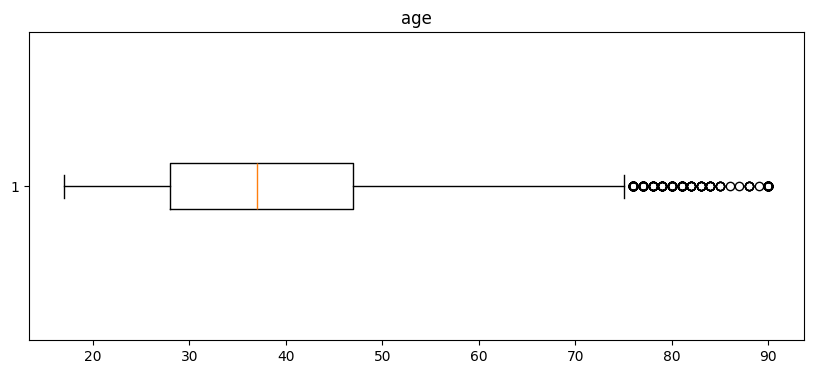

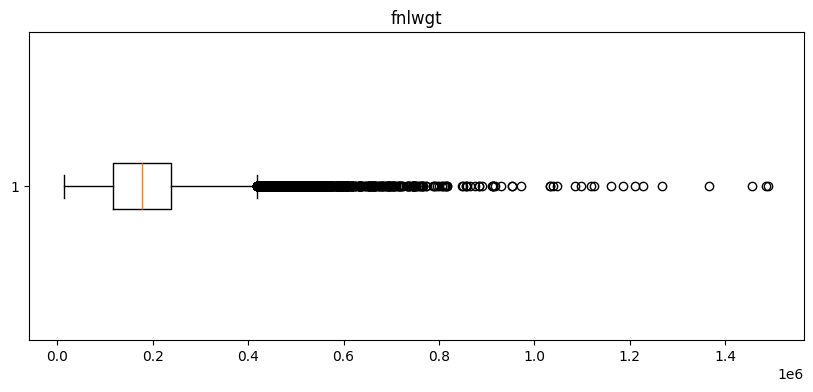

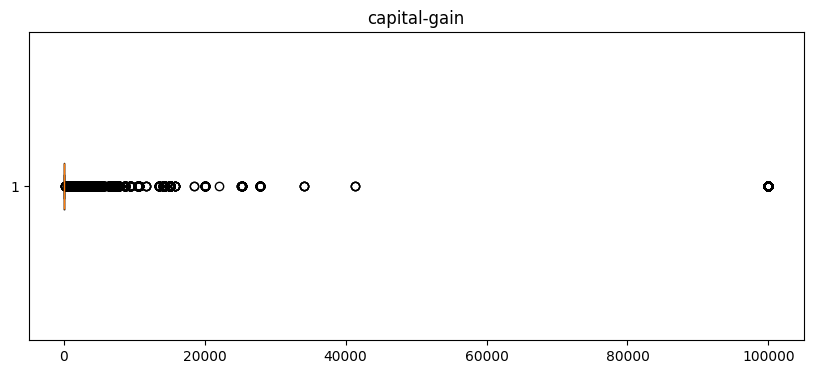

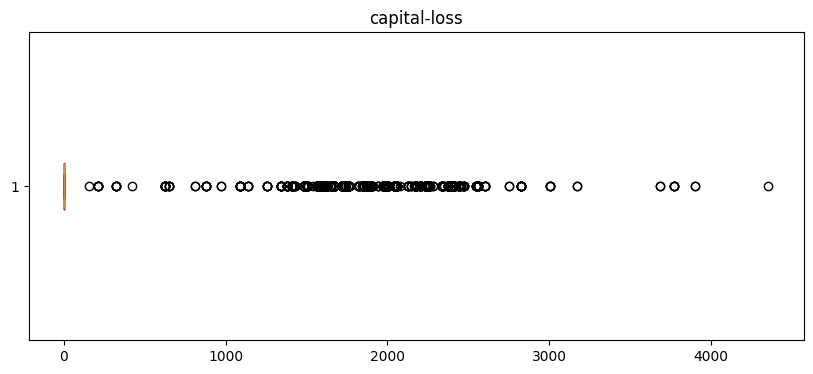

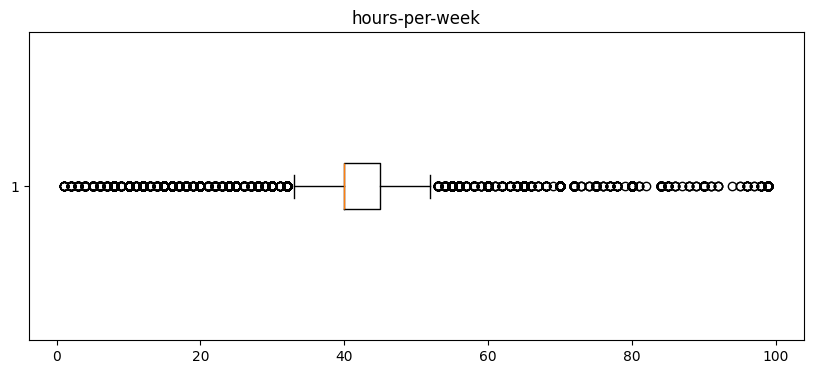

In [17]:
# Visualize the boxplot of the numerical columns to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()

## Winsorization

Winsorization is a robust method that limits the impact of outliers by replacing the extreme values with a specified percentile value from the data distribution. This approach preserves the overall size of the dataset while mitigating the influence of extreme outliers on statistical measures and subsequent analyses.

I replace the outliers with the 95th percentile for upper outliers and the 5th percentile for lower outliers. This way, the outliers are "pulled in" towards the center of the distribution, reducing their influence while preserving the overall structure of the data.

In [18]:
# Treat the outliers using Winsorization
from scipy.stats.mstats import winsorize

# Winsorize the numerical columns
for col in numerical_columns:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

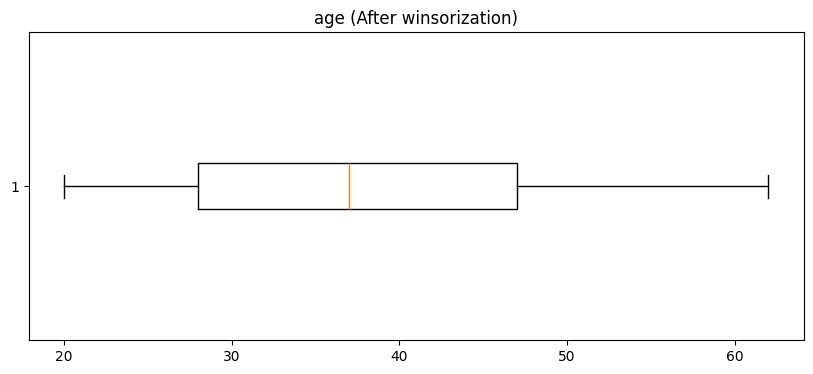

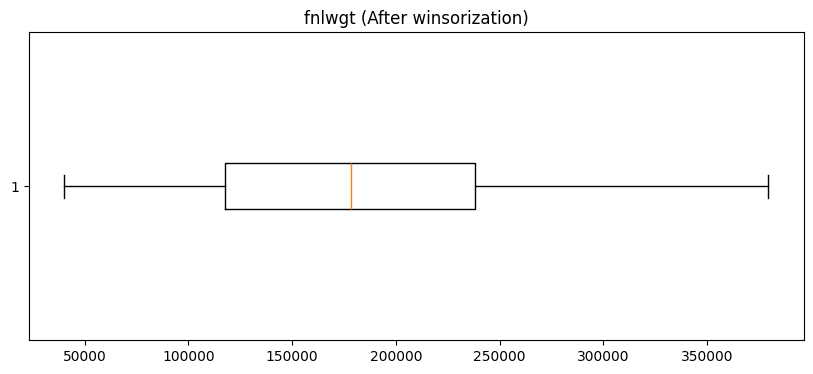

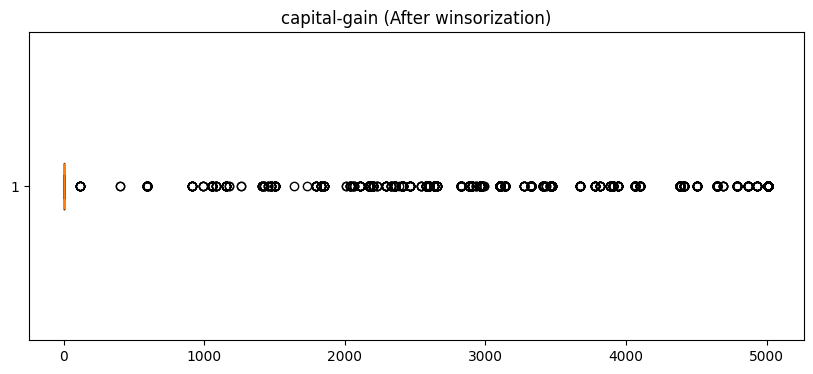

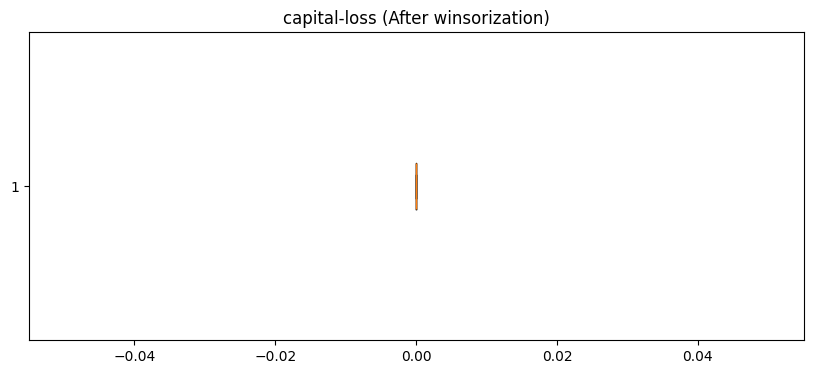

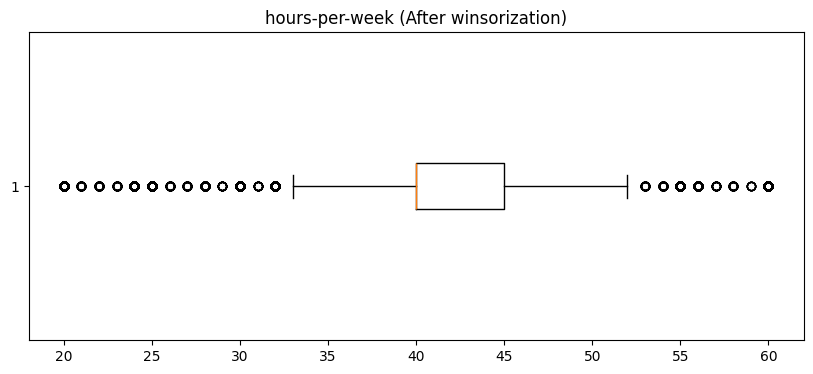

In [19]:
# Visualize the boxplot of the numerical columns to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f"{col} (After winsorization)")
    plt.show()

In [20]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45175.000000,45175.000000,45175.000000,45175.0,45175.000000
mean,38.316148,185749.679646,358.736425,0.0,40.778174
std,12.344316,91247.963769,1232.006670,0.0,9.779078
min,20.000000,39927.000000,0.000000,0.0,20.000000
25%,28.000000,117392.500000,0.000000,0.0,40.000000
50%,37.000000,178312.000000,0.000000,0.0,40.000000
75%,47.000000,237903.000000,0.000000,0.0,45.000000
max,62.000000,379525.000000,5013.000000,0.0,60.000000


### Conclusion
After winsorization:
1. `age`, `fnlwgt`, `capital-loss` columns has no outliers
2. `capital-gain`, `hours-per-week` columns have outliers
3. `capital-loss` column is constant (All values in the rows are 0)

`capital-loss` column does not provide any discriminative information for the machine learning model to learn. Therefore this feature will be removed.


In [21]:
# Remove capital-loss column
df = df.drop(columns=["capital-loss"])

### Label Encoding

Label Encoding is a technique used in machine learning to handle categorical data, which are variables that contain a finite set of unique values or categories. In Label Encoding, each category is assigned a unique numerical value.

The process involves mapping each category to a numerical label, typically starting from 0 and incrementing for each unique category.

In [22]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Get the categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    # Print the classes for each categorical column
    print(pd.DataFrame({col: le.classes_, 'label': le.transform(le.classes_)}))
    print()

          workclass  label
0       Federal-gov      0
1         Local-gov      1
2           Private      2
3      Self-emp-inc      3
4  Self-emp-not-inc      4
5         State-gov      5
6       Without-pay      6

       education  label
0           10th      0
1           11th      1
2           12th      2
3        1st-4th      3
4        5th-6th      4
5        7th-8th      5
6            9th      6
7     Assoc-acdm      7
8      Assoc-voc      8
9      Bachelors      9
10     Doctorate     10
11       HS-grad     11
12       Masters     12
13     Preschool     13
14   Prof-school     14
15  Some-college     15

          marital-status  label
0               Divorced      0
1      Married-AF-spouse      1
2     Married-civ-spouse      2
3  Married-spouse-absent      3
4          Never-married      4
5              Separated      5
6                Widowed      6

           occupation  label
0        Adm-clerical      0
1        Armed-Forces      1
2        Craft-repair      2
3

In [23]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,20,38,0
2,38,2,215646,11,0,5,1,4,1,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,40,4,0


In [24]:
# Save the cleaned data
df.to_csv('../Data/adult_cleaned_winsorized_label_encoded.csv', index=False)